In [ ]:
!pip install tensorflow==1.15.0

     |████████████████████████████████| 412.3 MB 23 kB/s 
     |████████████████████████████████| 3.8 MB 65.5 MB/s 
     |████████████████████████████████| 50 kB 7.9 MB/s 
     |████████████████████████████████| 503 kB 63.0 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=b21cea5d4355950f0a3fbe58ef91f57a49c9d8b4f19e6da22f8d421a7ca43f7b
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Succes

In [ ]:
!pip install keras==1.2.2

     |████████████████████████████████| 175 kB 6.4 MB/s 
     |████████████████████████████████| 2.8 MB 55.3 MB/s 
  Created wheel for keras: filename=Keras-1.2.2-py3-none-any.whl size=209601 sha256=dc12a487dd43b4a81bde8cd270422db4c0b5450f43c8eb580d9835197137be70
  Stored in directory: /root/.cache/pip/wheels/d1/32/23/2a1db3765ec19c91503843380a4f92b6530598949c661c5fa2
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668111 sha256=e38face03ff44c3af34e2c082bbbc526ab2e8632b2d78d75c7380b436c6e3075
  Stored in directory: /root/.cache/pip/wheels/26/68/6f/745330367ce7822fe0cd863712858151f5723a0a5e322cc144
Successfully built keras theano
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GoogleNews-vectors-negative300.bin.gz to GoogleNews-vectors-negative300.bin.gz


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from __future__ import division, print_function
from gensim.models import Word2Vec
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Merge, Dropout, Reshape, Flatten
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
import collections
from keras.preprocessing.sequence import pad_sequences
from ast import literal_eval
import gensim
from sklearn.utils import class_weight
import nltk

Using TensorFlow backend.


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP_Final_Project/Train_qaWithFact.csv",converters={"Answer": literal_eval})
df_val = pd.read_csv("/content/drive/MyDrive/NLP_Final_Project/Val_qaWithFact.csv",converters={"Answer": literal_eval})
df_test = pd.read_csv("/content/drive/MyDrive/NLP_Final_Project/Test_qaWithFact.csv",converters={"Answer": literal_eval})

df.head()

,Question,Fact,Answer,Answer Key
0,The sun is responsible for,the sun is the source of energy for physical c...,"[puppies learning new tricks, children growing...",D
1,When standing miles away from Mount Rushmore,"as distance to an object increases , that obje...","[the mountains seem very close, the mountains ...",D
2,When food is reduced in the stomach,digestion is when stomach acid breaks down food,"[the mind needs time to digest, take a second ...",C
3,Stars are,a star is made of gases,"[warm lights that float, made out of nitrate, ...",C
4,You can make a telescope with a,Galileo Galilei made improvements to the teles...,"[straw, Glass, Candle, mailing tube]",D


In [ ]:
df[['A','B','C','D']] = pd.DataFrame(df.Answer.tolist(), index= df.index)
df.head()

,Question,Fact,Answer,Answer Key,A,B,C,D
0,The sun is responsible for,the sun is the source of energy for physical c...,"[puppies learning new tricks, children growing...",D,puppies learning new tricks,children growing up and getting old,flowers wilting in a vase,"plants sprouting, blooming and wilting"
1,When standing miles away from Mount Rushmore,"as distance to an object increases , that obje...","[the mountains seem very close, the mountains ...",D,the mountains seem very close,the mountains are boring,the mountains look the same as from up close,the mountains seem smaller than in photographs
2,When food is reduced in the stomach,digestion is when stomach acid breaks down food,"[the mind needs time to digest, take a second ...",C,the mind needs time to digest,take a second to digest what I said,nutrients are being deconstructed,reader's digest is a body of works
3,Stars are,a star is made of gases,"[warm lights that float, made out of nitrate, ...",C,warm lights that float,made out of nitrate,great balls of gas burning billions of miles away,lights in the sky
4,You can make a telescope with a,Galileo Galilei made improvements to the teles...,"[straw, Glass, Candle, mailing tube]",D,straw,Glass,Candle,mailing tube


In [ ]:
df_val[['A','B','C','D']] = pd.DataFrame(df_val.Answer.tolist(), index= df_val.index)
df_val.head()

,Question,Fact,Answer,Answer Key,A,B,C,D
0,Frilled sharks and angler fish live far beneat...,deep sea animals live deep in the ocean,"[Deep sea animals, fish, Long Sea Fish, Far Se...",A,Deep sea animals,fish,Long Sea Fish,Far Sea Animals
1,"Gas can fill any container it is given, and li...",Matter in the liquid phase has definite volume,"[is standard weight and size, is the opposite ...",D,is standard weight and size,is the opposite of variable,only needs a few,uses what it needs
2,"When birds migrate south for the winter, they ...",migration is an instinctive behavior,"[they are genetically called to, their childre...",A,they are genetically called to,their children ask for them to,it is important to their happiness,they decide to each year
3,If a person walks in the opposite direction of...,a compass is a kind of tool for determining di...,"[west, north, east, south]",D,west,north,east,south
4,An example of lots kinetic energy would be,"as an object moves , the kinetic energy of tha...","[Drinking a cold glass of water, A snail movin...",D,Drinking a cold glass of water,A snail moving across the sidewalk,sitting without moving anywhere,An aircraft taking a trip


In [ ]:
DATA_DIR = "/content"
MODEL_DIR = "/content"
WORD2VEC_BIN = "GoogleNews-vectors-negative300.bin.gz"
WORD2VEC_EMBED_SIZE = 300

QA_TRAIN_FILE = "train.tsv"

QA_EMBED_SIZE = 64
BATCH_SIZE = 32
NBR_EPOCHS = 20

In [ ]:
WORD2VEC_BIN_DIR = "/content/drive/MyDrive/NLP_Final_Project"

In [ ]:
qapairs = []
question_file = os.path.join(DATA_DIR, QA_TRAIN_FILE)
question_file

'/content/train.tsv'

In [ ]:
print("Loading and formatting data...")
qfapairs = []
for i in range(len(df)):
  question = df['Question'][i]
  qwords = nltk.word_tokenize(question)
  fact = df['Fact'][i]
  fwords = nltk.word_tokenize(fact)
  correct_ans = df['Answer Key'][i]
  answers = df['A'][i]+'@'+df['B'][i]+'@'+df['C'][i]+'@'+df['D'][i]
  # training file parsing
  correct_ans_idx = ord(correct_ans) - ord('A')
  for idx, answer in enumerate(answers.split('@')):
    awords = nltk.word_tokenize(answer)
    qfapairs.append((qwords, fwords, awords, idx == correct_ans_idx))

Loading and formatting data...


In [ ]:
qfapairs[0:5]

[(['The', 'sun', 'is', 'responsible', 'for'],
  ['the',
   'sun',
   'is',
   'the',
   'source',
   'of',
   'energy',
   'for',
   'physical',
   'cycles',
   'on',
   'Earth'],
  ['puppies', 'learning', 'new', 'tricks'],
  False),
 (['The', 'sun', 'is', 'responsible', 'for'],
  ['the',
   'sun',
   'is',
   'the',
   'source',
   'of',
   'energy',
   'for',
   'physical',
   'cycles',
   'on',
   'Earth'],
  ['children', 'growing', 'up', 'and', 'getting', 'old'],
  False),
 (['The', 'sun', 'is', 'responsible', 'for'],
  ['the',
   'sun',
   'is',
   'the',
   'source',
   'of',
   'energy',
   'for',
   'physical',
   'cycles',
   'on',
   'Earth'],
  ['flowers', 'wilting', 'in', 'a', 'vase'],
  False),
 (['The', 'sun', 'is', 'responsible', 'for'],
  ['the',
   'sun',
   'is',
   'the',
   'source',
   'of',
   'energy',
   'for',
   'physical',
   'cycles',
   'on',
   'Earth'],
  ['plants', 'sprouting', ',', 'blooming', 'and', 'wilting'],
  True),
 (['When', 'standing', 'miles', 

In [ ]:
len(qfapairs)

19828

In [ ]:
qfapairs_val = []
for j in range(len(df_val)):
  question = df_val['Question'][j]
  qwords = nltk.word_tokenize(question)
  fact = df_val['Fact'][j]
  fwords = nltk.word_tokenize(fact)
  correct_ans = df_val['Answer Key'][j]
  answers = df_val['A'][j]+'@'+df_val['B'][j]+'@'+df_val['C'][j]+'@'+df_val['D'][j]
  # training file parsing
  correct_ans_idx = ord(correct_ans) - ord('A')
  for idx, answer in enumerate(answers.split('@')):
    awords = nltk.word_tokenize(answer)
    qfapairs_val.append((qwords, fwords, awords, idx == correct_ans_idx))

In [ ]:
qfapairs_val[0:5]

[(['Frilled',
   'sharks',
   'and',
   'angler',
   'fish',
   'live',
   'far',
   'beneath',
   'the',
   'surface',
   'of',
   'the',
   'ocean',
   ',',
   'which',
   'is',
   'why',
   'they',
   'are',
   'known',
   'as'],
  ['deep', 'sea', 'animals', 'live', 'deep', 'in', 'the', 'ocean'],
  ['Deep', 'sea', 'animals'],
  True),
 (['Frilled',
   'sharks',
   'and',
   'angler',
   'fish',
   'live',
   'far',
   'beneath',
   'the',
   'surface',
   'of',
   'the',
   'ocean',
   ',',
   'which',
   'is',
   'why',
   'they',
   'are',
   'known',
   'as'],
  ['deep', 'sea', 'animals', 'live', 'deep', 'in', 'the', 'ocean'],
  ['fish'],
  False),
 (['Frilled',
   'sharks',
   'and',
   'angler',
   'fish',
   'live',
   'far',
   'beneath',
   'the',
   'surface',
   'of',
   'the',
   'ocean',
   ',',
   'which',
   'is',
   'why',
   'they',
   'are',
   'known',
   'as'],
  ['deep', 'sea', 'animals', 'live', 'deep', 'in', 'the', 'ocean'],
  ['Long', 'Sea', 'Fish'],
  False),

In [ ]:
len(qfapairs_val)

2000

In [ ]:
question_maxlen = max([len(qapair[0]) for qapair in qfapairs])
fact_maxlen = max([len(qapair[1]) for qapair in qfapairs])
answer_maxlen = max([len(qapair[2]) for qapair in qfapairs])
seq_maxlen = max([question_maxlen, fact_maxlen, answer_maxlen])
print(question_maxlen, fact_maxlen, answer_maxlen, seq_maxlen)

76 28 23 76


In [ ]:
question_maxlen_val = max([len(qapair[0]) for qapair in qfapairs_val])
fact_maxlen_val = max([len(qapair[1]) for qapair in qfapairs_val])
answer_maxlen_val = max([len(qapair[2]) for qapair in qfapairs_val])
seq_maxlen_val = max([question_maxlen_val, fact_maxlen_val, answer_maxlen_val])
print(question_maxlen_val, fact_maxlen_val, answer_maxlen_val, seq_maxlen_val)

62 28 20 62


In [ ]:
def build_vocab(stories, qapairs, testqs):
    wordcounts = collections.Counter()
    for story in stories:
        for sword in story:
            wordcounts[sword] += 1
    for qapair in qapairs:
        for qword in qapair[0]:
            wordcounts[qword] += 1
        for fword in qapair[1]:
            wordcounts[fword] += 1
        for aword in qapair[2]:
            wordcounts[aword] += 1
    for testq in testqs:
        for qword in testq[0]:
            wordcounts[qword] += 1
        for fword in testq[1]:
            wordcounts[fword] += 1
        for aword in testq[2]:
            wordcounts[aword] += 1
    words = [wordcount[0] for wordcount in wordcounts.most_common()]
    word2idx = {w: i+1 for i, w in enumerate(words)}  # 0 = mask
    return word2idx

In [ ]:
word2idx = build_vocab([], qfapairs, [])
vocab_size = len(word2idx) + 1 # include mask character 0

In [ ]:
word2idx_val = build_vocab([], qfapairs_val, [])

In [ ]:
def vectorize_qapairs(qfapairs, word2idx, seq_maxlen):
    Xq, Xf, Xa, Y = [], [], [], []
    for qapair in qfapairs:
        Xq.append([word2idx[qword] for qword in qapair[0]])
        Xf.append([word2idx[fword] for fword in qapair[1]])
        Xa.append([word2idx[aword] for aword in qapair[2]])
        Y.append(np.array([1, 0]) if qapair[3] else np.array([0, 1]))
    return (pad_sequences(Xq, maxlen=seq_maxlen), 
            pad_sequences(Xf, maxlen=seq_maxlen), 
            pad_sequences(Xa, maxlen=seq_maxlen),
            np.array(Y))

In [ ]:
word2idx['puppies']

4312

In [ ]:
Xqtrain, Xftrain, Xatrain, Ytrain = vectorize_qapairs(qfapairs, word2idx, seq_maxlen)
Xqval, Xfval, Xaval, Yval = vectorize_qapairs(qfapairs_val, word2idx_val, seq_maxlen)
print(Xqtrain.shape, Xqval.shape, Xftrain.shape, Xfval.shape, Xatrain.shape, Xaval.shape, 
      Ytrain.shape, Yval.shape)

(19828, 76) (2000, 76) (19828, 76) (2000, 76) (19828, 76) (2000, 76) (19828, 2) (2000, 2)


In [ ]:
Ytrain[5000:5003]

array([[1, 0],
       [0, 1],
       [0, 1]])

In [ ]:
np.unique(Ytrain)

array([0, 1])

In [ ]:
Ytrain_flat = np.argmax(Ytrain, axis=1)
Ytrain_flat.shape

(19828,)

In [ ]:
Ytrain_flat[5000:5003]

array([0, 1, 1])

In [ ]:
qa_class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(Ytrain_flat), y=Ytrain_flat)
qa_class_weights

array([2.        , 0.66666667])

In [ ]:
qa_class_weights_dict = dict(zip(np.unique(Ytrain_flat), qa_class_weights))
qa_class_weights_dict

{0: 2.0, 1: 0.6666666666666666}

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler_q = preprocessing.StandardScaler().fit(Xqtrain)
Xqtrain_scaled = scaler_q.transform(Xqtrain)
Xqval_scaled = scaler_q.transform(Xqval)

In [ ]:
scaler_f = preprocessing.StandardScaler().fit(Xftrain)
Xftrain_scaled = scaler_f.transform(Xftrain)
Xfval_scaled = scaler_f.transform(Xfval)

In [ ]:
scaler_a = preprocessing.StandardScaler().fit(Xatrain)
Xatrain_scaled = scaler_a.transform(Xatrain)
Xaval_scaled = scaler_a.transform(Xaval)

In [ ]:
Xqtrain, Xftrain, Xatrain
Xqval, Xfval, Xaval

In [ ]:
Xaval_scaled[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.00710185, -0.00710185,
       -0.01566655, -0.00711995, -0.01529632, -0.01167824, -0.01113962,
       -0.01839139, -0.01364924, -0.01660926, -0.02711171, -0.02995816,
       -0.04235791, -0.05306435, -0.07613141, -0.08101213, -0.12

In [ ]:
print("Loading Word2Vec model and generating embedding matrix...")
word2vec = gensim.models.KeyedVectors.load_word2vec_format(
    os.path.join(WORD2VEC_BIN_DIR, WORD2VEC_BIN), binary=True)
embedding_weights = np.zeros((vocab_size, WORD2VEC_EMBED_SIZE))
for word, index in word2idx.items():
    try:
        embedding_weights[index, :] = word2vec[word.lower()]
    except KeyError:
        pass

Loading Word2Vec model and generating embedding matrix...


In [ ]:
QA_EMBED_SIZE = 16
NBR_EPOCHS = 40

In [ ]:
print("Building model...")
qenc = Sequential()
qenc.add(Embedding(output_dim=WORD2VEC_EMBED_SIZE, input_dim=vocab_size,
                   input_length=seq_maxlen, weights=[embedding_weights]))
qenc.add(LSTM(QA_EMBED_SIZE, return_sequences=True))
qenc.add(Dropout(0.4))

fenc = Sequential()
fenc.add(Embedding(output_dim=WORD2VEC_EMBED_SIZE, input_dim=vocab_size,
                   input_length=seq_maxlen, weights=[embedding_weights]))
fenc.add(LSTM(QA_EMBED_SIZE, return_sequences=True))
fenc.add(Dropout(0.4))

aenc = Sequential()
aenc.add(Embedding(output_dim=WORD2VEC_EMBED_SIZE, input_dim=vocab_size,
                   input_length=seq_maxlen,
                   weights=[embedding_weights]))
aenc.add(LSTM(QA_EMBED_SIZE, return_sequences=True))
aenc.add(Dropout(0.4))

#combination model
comb = Sequential()
comb.add(Merge([qenc, fenc], mode="sum"))
comb.add(Flatten())
comb.add(Dense((seq_maxlen * QA_EMBED_SIZE)))
comb.add(Reshape((seq_maxlen, QA_EMBED_SIZE)))

# attention model
attn = Sequential()
attn.add(Merge([comb, aenc], mode="dot", dot_axes=[1, 1]))
attn.add(Flatten())
attn.add(Dense((seq_maxlen * QA_EMBED_SIZE)))
attn.add(Reshape((seq_maxlen, QA_EMBED_SIZE)))

model = Sequential()
model.add(Merge([qenc, attn], mode="sum"))
model.add(Flatten())
model.add(Dense(2, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy",
              metrics=["accuracy"])

Building model...


In [143]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_28 (Embedding)         (None, 76, 300)       3432900                                      
____________________________________________________________________________________________________
lstm_28 (LSTM)                   (None, 76, 16)        20288                                        
____________________________________________________________________________________________________
dropout_28 (Dropout)             (None, 76, 16)        0                                            
____________________________________________________________________________________________________
embedding_29 (Embedding)         (None, 76, 300)       3432900                                      
___________________________________________________________________________________________

In [ ]:
model_checkpoint = ModelCheckpoint(
    filepath=os.path.join(MODEL_DIR, "qa-lstm-attn-best-qaWithFact.hdf5"),
    verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=8)
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-8)
qa_callbacks = [model_checkpoint, early_stopping_callback, reduce_lr_callback]

In [ ]:
print("Training...")
model_history = model.fit([Xqtrain_scaled, Xftrain_scaled, Xatrain_scaled], Ytrain, batch_size=BATCH_SIZE,
          nb_epoch=NBR_EPOCHS, validation_data=([Xqval_scaled, Xfval_scaled, Xaval_scaled], Yval),
          callbacks=qa_callbacks, class_weight=qa_class_weights_dict)

Training...
Train on 19828 samples, validate on 2000 samples
Epoch 1/40
19828/19828 [==============================] - 169s - loss: 0.6974 - acc: 0.5625 - val_loss: 0.6936 - val_acc: 0.6445
Epoch 2/40
19828/19828 [==============================] - 154s - loss: 0.6879 - acc: 0.6120 - val_loss: 0.7452 - val_acc: 0.2500
Epoch 3/40
19828/19828 [==============================] - 154s - loss: 0.6854 - acc: 0.6081 - val_loss: 0.6853 - val_acc: 0.6750
Epoch 4/40
19828/19828 [==============================] - 151s - loss: 0.6843 - acc: 0.6148 - val_loss: 0.6420 - val_acc: 0.7185
Epoch 5/40
19828/19828 [==============================] - 151s - loss: 0.6842 - acc: 0.6289 - val_loss: 0.6733 - val_acc: 0.6770
Epoch 6/40
19828/19828 [==============================] - 152s - loss: 0.6833 - acc: 0.6282 - val_loss: 0.6845 - val_acc: 0.6785
Epoch 7/40
19828/19828 [==============================] - 152s - loss: 0.6830 - acc: 0.6262 - val_loss: 0.6588 - val_acc: 0.7265
Epoch 8/40
19808/19828 [============

In [ ]:
from google.colab import files
files.download('/content/qa-lstm-attn-best-qaWithFact.hdf5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

In [ ]:
def create_line_charts(df, metric_name, title, xlabel, ylabel, figsize=(12,8)):
  fig, ax = plt.subplots(figsize=figsize)
  plt.plot('epochs', 'train_' + metric_name, data=df)
  plt.plot('epochs', 'val_' + metric_name, data=df)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.legend()
  plt.show()

def create_metrics_df(history_data, num_epochs, metric_name):
  epochs_val = list(range(1, num_epochs+1))
  training_metric_val = history_data.history[metric_name]
  validation_metric_val = history_data.history['val_' + metric_name]
  metric_dict = {
    'epochs':epochs_val,
    'train_' + metric_name: training_metric_val,
    'val_' + metric_name: validation_metric_val
  }
  metric_df = pd.DataFrame(metric_dict)
  return metric_df

In [ ]:
def generate_metrics_plots(model_history_data, epochs):
  all_metrics = ['acc', 'loss']
  for cur_metric in all_metrics:
    create_line_charts(create_metrics_df(model_history_data, epochs, cur_metric), cur_metric, 'Comparison of training and validation {} values'.format(cur_metric), 'Epochs', '{} Values'.format(cur_metric))

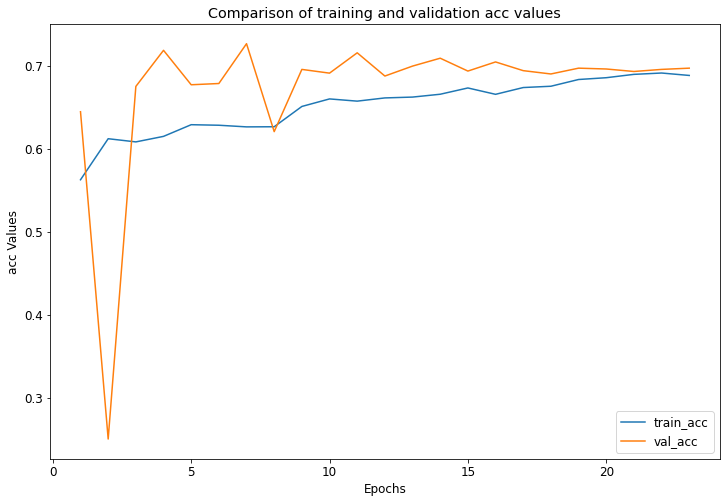

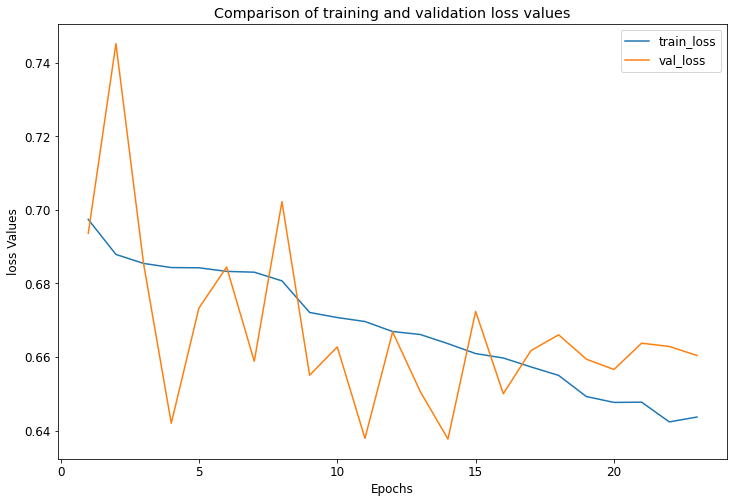

In [ ]:
generate_metrics_plots(model_history, 23)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
def generate_confusion_matrix(y_true, y_pred, class_labels, fig_size=(10,10), cmap='inferno'):
  cm = confusion_matrix(y_true, y_pred)
  cmdisp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
  fig, ax = plt.subplots(figsize=fig_size)
  ax.grid(False)
  cmdisp.plot(ax=ax, cmap=cmap)
  plt.show()

In [ ]:
df_test[['A','B','C','D']] = pd.DataFrame(df_test.Answer.tolist(), index= df_test.index)
df_test.head()

,Question,Fact,Answer,Answer Key,A,B,C,D
0,A person wants to start saving money so that t...,using less resources usually causes money to b...,"[make more phone calls, quit eating lunch out,...",B,make more phone calls,quit eating lunch out,buy less with monopoly money,have lunch with friends
1,There is most likely going to be fog around:,fog is formed by water vapor condensing in the...,"[a marsh, a tundra, the plains, a desert]",A,a marsh,a tundra,the plains,a desert
2,Predators eat,predators eat prey,"[lions, humans, bunnies, grass]",C,lions,humans,bunnies,grass
3,Oak tree seeds are planted and a sidewalk is p...,if a tree is located near a sidewalk then the ...,"[roots may be split, roots may begin to die, p...",C,roots may be split,roots may begin to die,parts may break the concrete,roots may fall apart
4,An electric car runs on electricity via,An electrical conductor is a vehicle for the f...,"[gasoline, a power station, electrical conduct...",C,gasoline,a power station,electrical conductors,fuel


In [ ]:
qapairs_test = []
for k in range(len(df_test)):
  question = df_test['Question'][k]
  qwords = nltk.word_tokenize(question)
  fact = df_test['Fact'][k]
  fwords = nltk.word_tokenize(fact)
  correct_ans = df_test['Answer Key'][k]
  answers = df_test['A'][k]+'@'+df_test['B'][k]+'@'+df_test['C'][k]+'@'+df_test['D'][k]
  # training file parsing
  correct_ans_idx = ord(correct_ans) - ord('A')
  for idx, answer in enumerate(answers.split('@')):
    awords = nltk.word_tokenize(answer)
    qapairs_test.append((qwords, fwords, awords, idx == correct_ans_idx))

In [ ]:
word2idx_test = build_vocab([], qapairs_test, [])

In [ ]:
Xqtest, Xftest, Xatest, Ytest = vectorize_qapairs(qapairs_test, word2idx_test, seq_maxlen)

In [ ]:
Xqtest_scaled = scaler_q.transform(Xqtest)
Xftest_scaled = scaler_f.transform(Xftest)
Xatest_scaled = scaler_a.transform(Xatest)

In [ ]:
print("Evaluate on test data")
results = model.evaluate([Xqtest_scaled, Xftest_scaled, Xatest_scaled], Ytest, batch_size=BATCH_SIZE)
print("test loss, test acc:", results)

Evaluate on test data
2000/2000 [==============================] - 3s     
test loss, test acc: [0.659426513671875, 0.6985]


In [ ]:
predictions = model.predict([Xqtest_scaled, Xftest_scaled, Xatest_scaled], verbose=0)

In [ ]:
predictions[0:5]

array([[0.4087847 , 0.5912154 ],
       [0.3665429 , 0.6334571 ],
       [0.35064045, 0.6493596 ],
       [0.4087847 , 0.5912154 ],
       [0.41299537, 0.58700466]], dtype=float32)

In [ ]:
Ypred = np.argmax(predictions, axis=1)

In [ ]:
Ytrue = np.argmax(Ytest, axis=1)

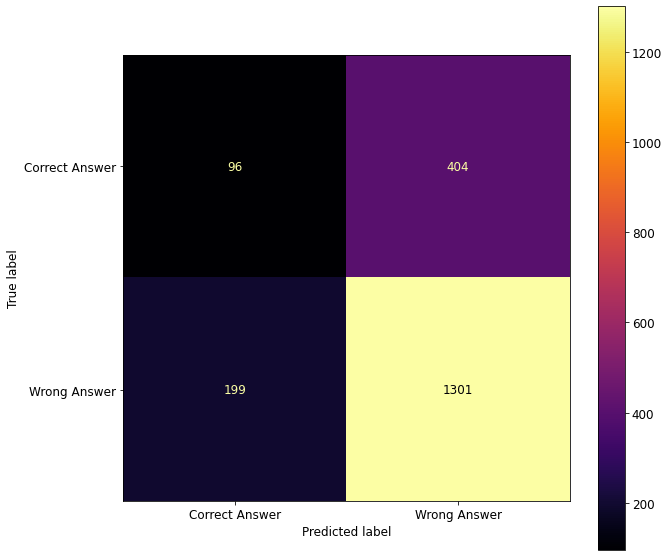

In [ ]:
generate_confusion_matrix(Ytrue, Ypred, ['Correct Answer','Wrong Answer'])

In [ ]:
def save_np_data(file_path, input_arr):
  with open(file_path, 'wb') as f:
    np.save(f, input_arr)

In [ ]:
save_np_data(os.path.join('/content/drive/MyDrive/NLP_Final_Project', 'model_qafacts_predictions.npy'), predictions)
save_np_data(os.path.join('/content/drive/MyDrive/NLP_Final_Project', 'model_qafacts_test.npy'), Ytest)